In [1]:
import matplotlib.pyplot as plt
import numpy as np

Diffusion-limited aggregation (DLA).

hit immovable object
hit immovable object
hit immovable object


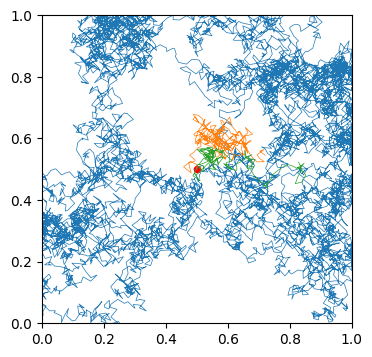

In [41]:
class Particle:
    def __init__(self, x = None, y = None):
        if not x and not y:
            self.x, self.y = np.random.rand(2)
        else:
            self.x, self.y = x, y

    def __repr__(self):
        return f"P({self.x:0.3f}, {self.y:0.3f})"


immovable = [
    Particle(0.5,0.5)
]

fig, ax = plt.subplots(figsize=(4,4))
ax.set(xlim=[0,1], ylim=[0,1])

for imm in immovable:
    plt.scatter(imm.x, imm.y, s=20, c='r')

max_iters = 8_000

traj = np.zeros((max_iters, 2))

def update():
    global immovable

    particle = Particle()
    traj[0,:] = [particle.x, particle.y]
    idx = 0
    while (idx < max_iters):
        # move it
        particle.x += 0.05*(np.random.rand()-0.5)
        particle.y += 0.05*(np.random.rand()-0.5)
            
        # clip to space
        particle.x = np.clip(particle.x, 0, 1)
        particle.y = np.clip(particle.y, 0, 1)

        traj[idx, :] = [particle.x, particle.y]

        for imm in immovable:
            if (imm.x - particle.x)**2 + (imm.y - particle.y)**2 < 0.01**2:
                print('hit immovable object')
                return traj[0:idx+1, :]

        idx += 1
    return traj[0:idx+1, :]
    
traj = update()
ax.plot(traj[:,0], traj[:,1], lw=0.5)
traj = update()
ax.plot(traj[:,0], traj[:,1], lw=0.5)
traj = update()
ax.plot(traj[:,0], traj[:,1], lw=0.5)
